In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [135]:
import numpy as np
from datasets.density_datasets import Datasets as DensityDatasets
from datasets.real_world_datasets import Datasets as RealWorldDatasets
from src.Evaluation.dcdistances.dctree import DCTree
from sklearn.cluster import DBSCAN
from src.Evaluation import disco_score as DISCO

# dataset = DensityDatasets.complex9
dataset = RealWorldDatasets.Synth_high
X, l = dataset.standardized_data_cached

ks = range(2, 20)

dctree = DCTree(X, min_points=5, min_points_mr=2)
eps_list = [dctree.get_eps_for_k(k) for k in ks]
kcenter_results = [dctree.get_k_center(k) for k in ks]
kcenter_disco_results = [DISCO(X, l_) for l_ in kcenter_results]
dbscan_results = [DBSCAN(eps).fit(X).labels_ for eps in eps_list]
dbscan_disco_results = [DISCO(X, l_) for l_ in dbscan_results]

In [136]:
[len(set(l_)) for l_ in kcenter_results]

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [137]:
[len(set(l_)) for l_ in dbscan_results]

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [138]:
import pandas as pd

data_dict = {
    "k": ks,
    "eps": eps_list,
    "kcenter_disco": kcenter_disco_results,
    "dbscan_disco": dbscan_disco_results,
    "dataset": dataset.name,
}

df = pd.DataFrame(data_dict)

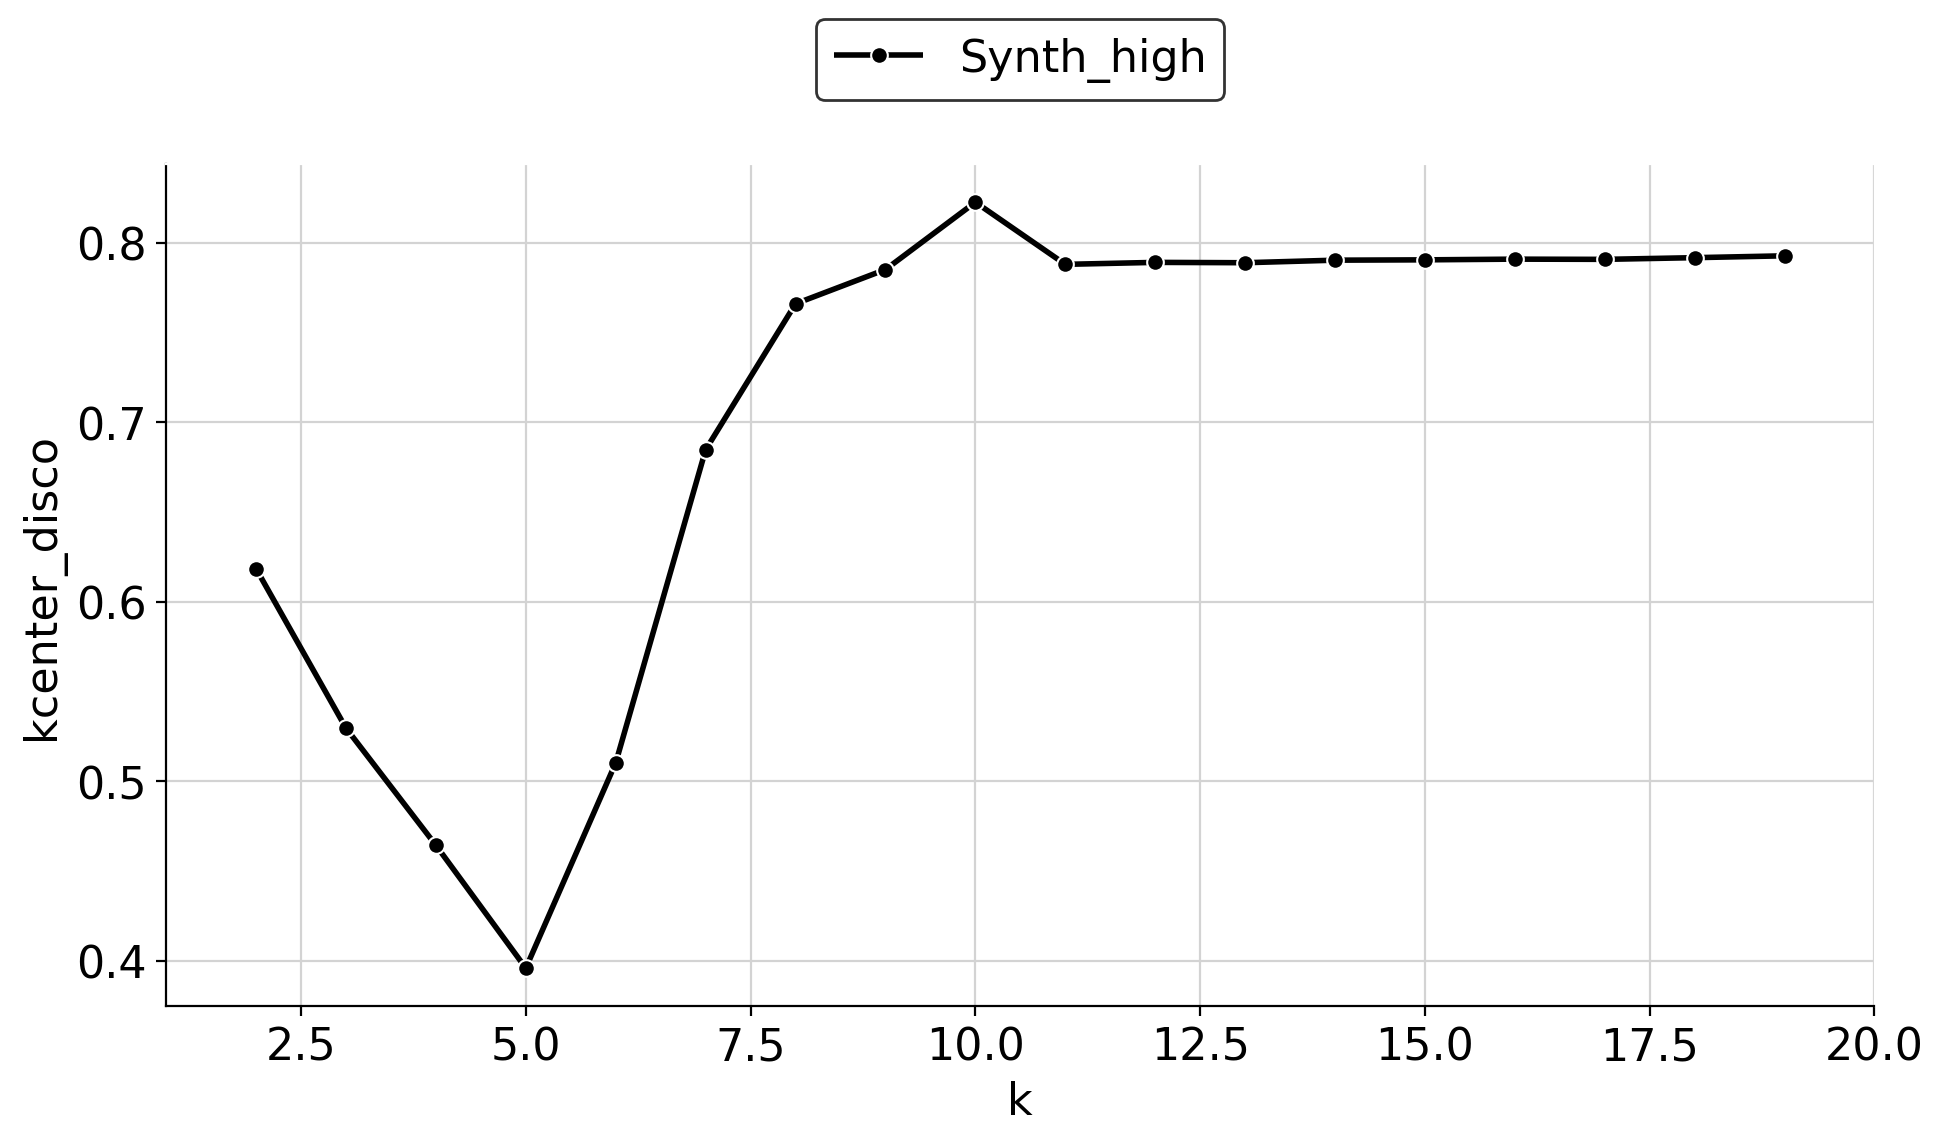

In [139]:
from src.utils.plots import plot_lineplot
import matplotlib.pyplot as plt

eps = 1
x_range = ks[0] - eps, ks[-1] + eps

plot_lineplot(df, "k", "kcenter_disco", "dataset", x_range=x_range, y_range=(None, None), order=[dataset.name])
plt.savefig("imgs/aggregation_find_k.png")
plt.show()

In [140]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    return colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )

cmap = truncate_colormap(plt.colormaps["gist_rainbow"], 0.0, 0.85)

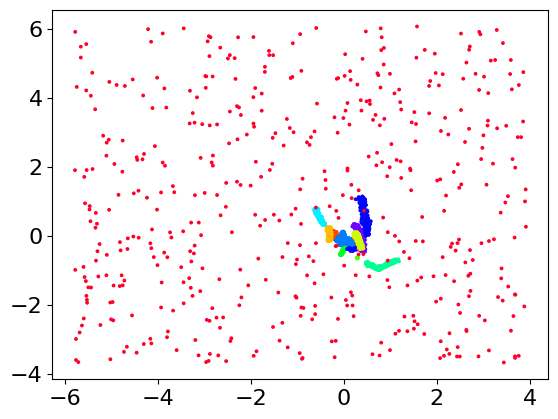

In [141]:
plt.scatter(X[:, 0], X[:, 1], s=3, c=kcenter_results[np.argmax(kcenter_disco_results)], cmap=cmap)
plt.show()

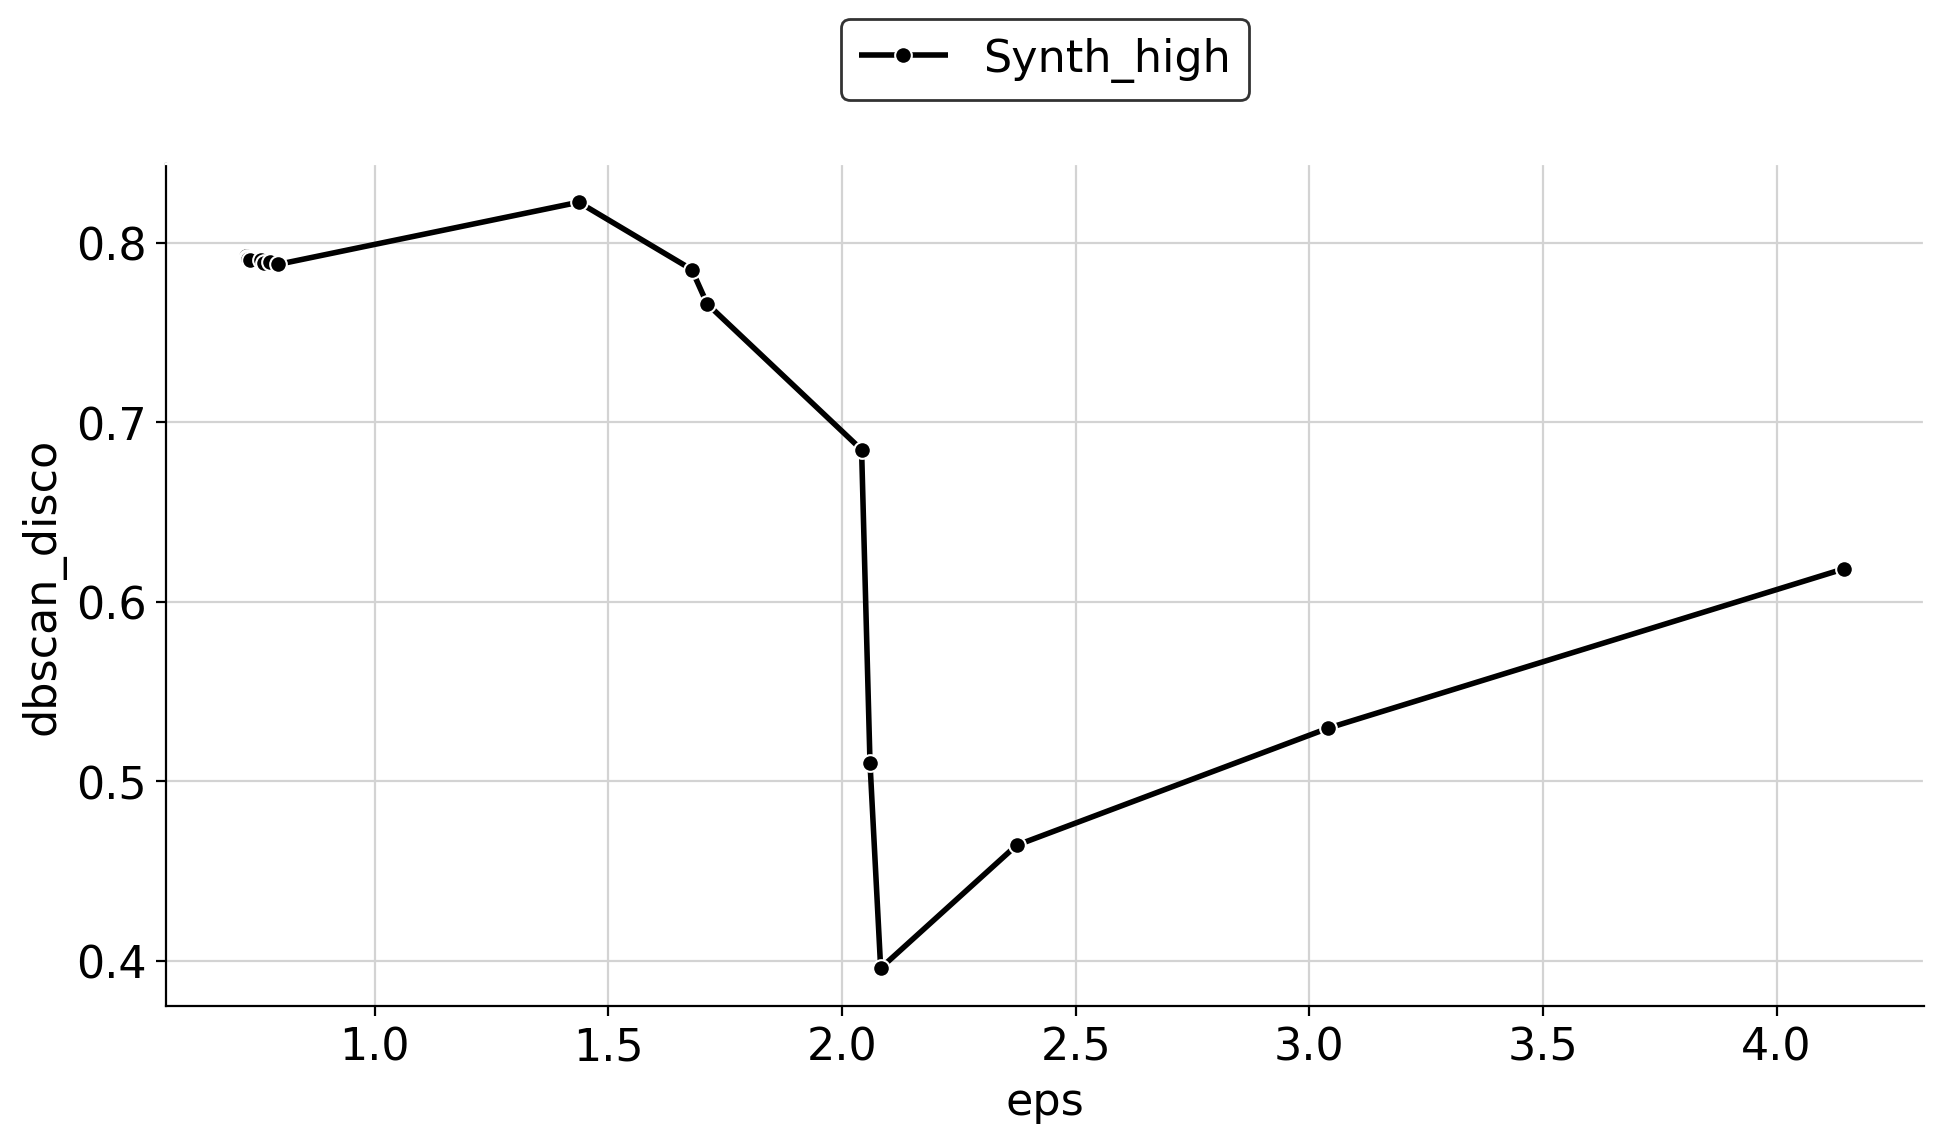

In [142]:
from src.utils.plots import plot_lineplot
import matplotlib.pyplot as plt

eps = 1
x_range = None, None

plot_lineplot(df, "eps", "dbscan_disco", "dataset", x_range=x_range, y_range=(None, None), order=[dataset.name])
plt.savefig("imgs/aggregation_find_eps.png")
plt.show()

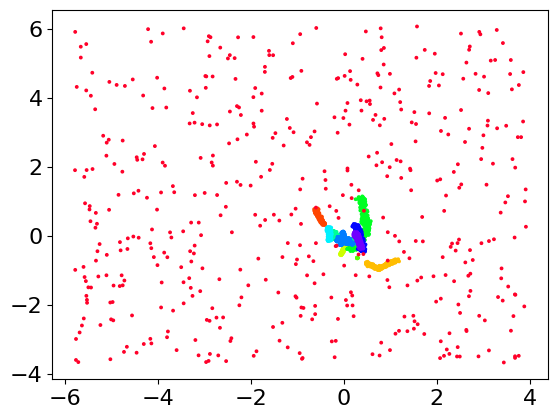

In [143]:
plt.scatter(X[:, 0], X[:, 1], s=3, c=dbscan_results[np.argmax(dbscan_disco_results)], cmap=cmap)
plt.show()

In [40]:
import numpy as np 

l__ = np.random.choice(170, len(l))
print(f"Nr of Clusters: {len(set(l__))}, DISCO: {DISCO(X, l__)}")

Nr of Clusters: 169, DISCO: -0.6261443955539113


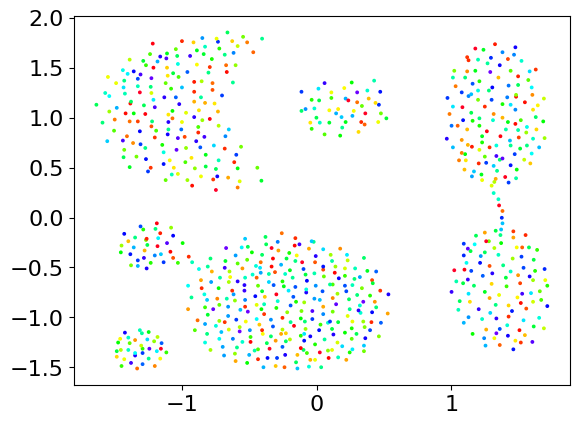

In [41]:
plt.scatter(X[:, 0], X[:, 1], s=3, c=l__, cmap=cmap)
plt.show()

In [70]:
import numpy as np

ks = np.array([range(1, 300) for j in range(10)]).flatten()

ls = [np.random.choice(i, len(l)) for i in ks]
disco = [DISCO(X, l) for l in ls]

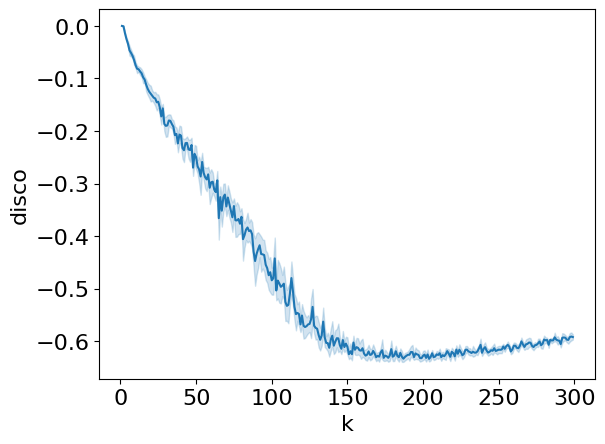

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_dict = {
    "k": ks,
    "disco": disco,
}
df = pd.DataFrame(data_dict)

sns.lineplot(df, x="k", y="disco")
plt.show()